## Executive Summary

I used Brain Tumor Dataset where I downloaded from Kaggle. There were two different folder one of them tumor positive images and other one is tumor negative images. All dataset had 278 images half of them is true and others negative. I built Convolutional Neural Network (CNN) with Functional API. The model had 1 input 10 hidden 1 output layers. To prevent the overfitting 3 times was used drop. In the hidden layer Relu activation function was used, and softmax used in the output layer. When compiling model, Categorical Cross Entropy used as a loss function, Adamax used as an optimizer, and accuracy used as a metric. I apply 40 epochs and 128 batch size in this model. As a result, model training dataset accurcy is 1 and test dataset accuracy is .71.

## Import the Libraries

In [3]:
import os
from PIL import Image
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Encode the Result

In [5]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

## Organize the dataset

In [13]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\Lenovo Pc\Desktop\Projects\Tumor Detection with Tensorflow Functional API\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
result[0]       

array([[1., 0.]])

In [14]:
paths = []
for r, d, f in os.walk(r"C:\Users\Lenovo Pc\Desktop\Projects\Tumor Detection with Tensorflow Functional API\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [15]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [17]:
result = np.array(result)
result = result.reshape(139,2)
result.shape

(139, 2)

## Split the data train and test

In [19]:
train_images, test_images, train_labels, test_labels = train_test_split(data,
                                                                        result, test_size=0.1, shuffle=True, random_state=1)

In [20]:
print('Train Images Shape', train_images.shape)
print('Train Labels Shape', train_labels.shape)
print('Test Images Shape', test_images.shape)
print('Test Labels Shape', test_labels.shape)

Train Images Shape (125, 128, 128, 3)
Train Labels Shape (125, 2)
Test Images Shape (14, 128, 128, 3)
Test Labels Shape (14, 2)


## Build the model

In [21]:
inputs = tf.keras.Input(shape=(128, 128, 3))

conv2d_layer = tf.keras.layers.Conv2D(32, (2,2), padding='Same')(inputs)
conv2d_layer = tf.keras.layers.Conv2D(32, (2,2), activation='relu', padding='Same')(conv2d_layer)

bn_layer = tf.keras.layers.BatchNormalization()(conv2d_layer)
mp_layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(bn_layer)
drop = tf.keras.layers.Dropout(0.25)(mp_layer)

conv2d_layer = tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='Same')(drop)
conv2d_layer = tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='Same')(conv2d_layer)

bn_layer = tf.keras.layers.BatchNormalization()(conv2d_layer)
mp_layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(bn_layer)
drop = tf.keras.layers.Dropout(0.25)(mp_layer)

flatten_layer = tf.keras.layers.Flatten()(drop)

dense_layer = tf.keras.layers.Dense(512, activation='relu')(flatten_layer)
drop = tf.keras.layers.Dropout(0.5)(dense_layer)
outputs = tf.keras.layers.Dense(2, activation='softmax')(drop)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='tumor_model')
model.summary()

Model: "tumor_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        

## Compile the model

In [22]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adamax(),
             metrics = ['accuracy'])

## Train the model

In [23]:
history = model.fit(train_images, train_labels,
                   epochs=40,
                   batch_size=128,
                   validation_data=(test_images, test_labels))

Epoch 1/40
1/1 [==============================] - 9s 9s/step - loss: 1.7608 - accuracy: 0.5280 - val_loss: 26.5454 - val_accuracy: 0.7857
Epoch 2/40
1/1 [==============================] - 5s 5s/step - loss: 8.8484 - accuracy: 0.7200 - val_loss: 176.0831 - val_accuracy: 0.3571
Epoch 3/40
1/1 [==============================] - 5s 5s/step - loss: 41.5962 - accuracy: 0.5280 - val_loss: 13.9791 - val_accuracy: 0.7143
Epoch 4/40
1/1 [==============================] - 5s 5s/step - loss: 3.5604 - accuracy: 0.8160 - val_loss: 41.0825 - val_accuracy: 0.7857
Epoch 5/40
1/1 [==============================] - 5s 5s/step - loss: 9.9984 - accuracy: 0.7040 - val_loss: 38.7669 - val_accuracy: 0.7857
Epoch 6/40
1/1 [==============================] - 5s 5s/step - loss: 9.3307 - accuracy: 0.7600 - val_loss: 20.6727 - val_accuracy: 0.7857
Epoch 7/40
1/1 [==============================] - 5s 5s/step - loss: 4.2946 - accuracy: 0.8480 - val_loss: 12.5981 - val_accuracy: 0.7857
Epoch 8/40
1/1 [================

## Visualize the Model Loss

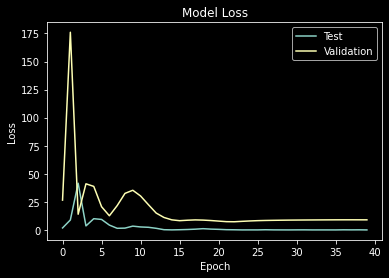

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

## Define a function to use when test the model

In [25]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


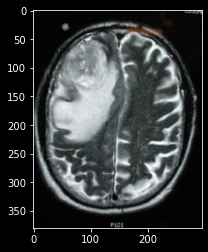

In [28]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Lenovo Pc\Desktop\Projects\Tumor Detection with Tensorflow Functional API/yes/Y22.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is No, Its not a tumor


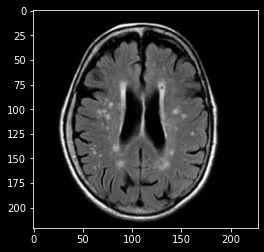

In [34]:
img = Image.open(r"C:\Users\Lenovo Pc\Desktop\Projects\Tumor Detection with Tensorflow Functional API/no/18 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

## Evaluate the model

I can say that the model can predict truely the image. Note that test model accuracy is .71 so, the model can be predict wrong some images.

## Note: 
I used Melih Emin Kılıcoglu codes in this projects which can be reached at https://www.kaggle.com/code/melihemin/tumor-dedection-tensorflow-functional-api/notebook 